<a href="https://colab.research.google.com/github/programminghistorian/jekyll/blob/Issue-3052/assets/corpus-analysis-with-spacy/corpus-analysis-with-spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corpus Analysis with spaCy
## by Megan S. Kane
#### https://programminghistorian.org/en/lessons/corpus-analysis-with-spacy
(Slightly adapted by Yevgen Matusevych for Collecting Data class at RUG.)

### Introduction

Say you have a big collection of texts. Maybe you’ve gathered speeches from the French Revolution, compiled a bunch of Amazon product reviews, or unearthed a collection of diary entries written during the first world war. In any of these cases, computational analysis can be a good way to compliment close reading of your corpus… but where should you start?

One possible way to begin is with spaCy, an industrial-strength library for Natural Language Processing (NLP) in Python. spaCy is capable of processing large corpora, generating linguistic annotations including part-of-speech tags and named entities, as well as preparing texts for further machine classification. This lab is a ‘spaCy 101’ of sorts, a primer for researchers who are new to spaCy and want to learn how it can be used for corpus analysis. It may also be useful for those who are curious about natural language processing tools in general, and how they can help us to answer humanities research questions.


### Lab Goals

By the end of this lab, you will be able to:

- Upload a corpus of texts to a platform for Python analysis
- Use spaCy to enrich the corpus through tokenization, lemmatization, part-of-speech tagging and named entity recognition
- Conduct frequency analyses using part-of-speech tags and named entities
- Download an enriched dataset for use in future NLP analyses



### Why Use spaCy for Corpus Analysis?

As the name implies, corpus analysis involves studying corpora, or large collections of documents. Typically, the documents in a corpus are representative of the group(s) a researcher is interested in studying, such as the writings of a specific author or genre. By analyzing these texts at scale, researchers can identify meaningful trends in the way language is used within the target group(s).

Though computational tools like spaCy can’t read and comprehend the meaning of texts like humans do, they excel at ‘parsing’ (analyzing sentence structure) and ‘tagging’ (labeling) them. When researchers give spaCy a corpus, it will ‘parse’ every document in the collection, identifying the grammatical categories to which each word and phrase in each text most likely belongs. NLP Algorithms like spaCy use this information to generate lexico-grammatical tags that are of interest to researchers, such as lemmas (base words), part-of-speech tags and named entities (more on these in the Part-of-Speech Analysis and Named Entity Recognition sections below). Furthermore, computational tools like spaCy can perform these parsing and tagging processes much more quickly (in a matter of seconds or minutes) and on much larger corpora (hundreds, thousands, or even millions of texts) than human readers would be able to.

Though spaCy was designed for industrial use in software development, researchers also find it valuable for several reasons:

- It’s easy to set up and use spaCy’s Trained Models and Pipelines; there is no need to call a wide range of packages and functions for each individual task
- It uses fast and accurate algorithms for text-processing tasks, which are kept up-to-date by the developers so it’s efficient to run
- It performs better on text-splitting tasks than Natural Language Toolkit (NLTK), because it constructs syntactic trees for each sentence
- You may still be wondering: What is the value of extracting language data such as lemmas, part-of-speech tags, and named entities from a corpus? How can this data help researchers answer meaningful humanities research questions? To illustrate, let’s look at the example corpus and questions developed for this lab.



### Dataset: Michigan Corpus of Upper-Level Student Papersdataset-michigan-corpus-of-upper-level-student-papers

The Michigan Corpus of Upper-Level Student Papers (MICUSP) is a corpus of 829 high-scoring academic writing samples from students at the University of Michigan. The texts come from 16 disciplines and seven genres, all were written by senior undergraduate or graduate students and received an A-range score in a university course.1 The texts and their metadata are publicly available on MICUSP Simple, an online interface which allows users to search for texts by a range of fields (for example genre, discipline, student level, textual features) and conduct simple keyword analyses across disciplines and genres.

This lab will explore a subset of documents from MICUSP: 67 Biology papers and 98 English papers. Writing samples in this select corpus belong to all seven MICUSP genres: Argumentative Essay, Creative Writing, Critique/Evaluation, Proposal, Report, Research Paper, and Response Paper. This select corpus .txt_files.zip and the associated metadata.csv are available to download as sample materials for this lab. The dataset has been culled from the larger corpus in order to investigate the differences between two distinct disciplines of academic writing (Biology and English). It is also a manageable size for the purposes of this lab.


### Research Questions: Linguistic Differences Within Student Paper Genres and Disciplines
This lab will describe how spaCy’s utilities in stopword removal, tokenization, and lemmatization can assist in (and hinder) the preparation of student texts for analysis. You will learn how spaCy’s ability to extract linguistic annotations such as part-of-speech tags and named entities can be used to compare conventions within subsets of a discursive community of interest. The lab focuses on lexico-grammatical features that may indicate genre and disciplinary differences in academic writing.

The following research questions will be investigated:

1: Do students use certain parts-of-speech more frequently in Biology texts versus English texts, and does this linguistic discrepancy signify differences in disciplinary conventions?
Prior research has shown that even when writing in the same genres, writers in the sciences follow different conventions than those in the humanities. Notably, academic writing in the sciences has been characterized as informational, descriptive, and procedural, while scholarly writing in the humanities is narrativized, evaluative, and situation-dependent (that is, focused on discussing a particular text or prompt)5. By deploying spaCy on the MICUSP texts, researchers can determine whether there are any significant differences between the part-of-speech tag frequencies in English and Biology texts. For example, we might expect students writing Biology texts to use more adjectives than those in the humanities, given their focus on description. Conversely, we might suspect English texts to contain more verbs and verb auxiliaries, indicating a more narrative structure. To test these hypotheses, you’ll learn to analyze part-of-speech counts generated by spaCy, as well as to explore other part-of-speech count differences that could prompt further investigation.

2: Do students use certain named entities more frequently in different academic genres, and do these varying word frequencies signify broader differences in genre conventions?
As with disciplinary differences, research has shown that different genres of writing have their own conventions and expectations. For example, explanatory genres such as research papers, proposals and reports tend to focus on description and explanation, whereas argumentative and critique-driven texts are driven by evaluations and arguments6. By deploying spaCy on the MICUSP texts, researchers can determine whether there are any significant differences between the named entity frequencies in texts within the seven different genres represented (Argumentative Essay, Creative Writing, Critique/Evaluation, Proposal, Report, Research Paper, and Response Paper). We may suspect that argumentative genres engage more with people or works of art, since these could be entities serving to support their arguments or as the subject of their critiques. Conversely, perhaps dates and numbers are more prevalent in evidence-heavy genres, such as research papers and proposals. To test these hypotheses, you’ll learn to analyze the nouns and noun phrases spaCy has tagged as ‘named entities.’

### Installing, Importing and Preprocessing

In [87]:
# Import spacy
import spacy

# Install English language model
!spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 5.6 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 6.4 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 7.0 MB/s eta 0:00:02
     ------------------ --------------------- 6.0/12.8 MB 7.5 MB/s eta 0:00:01
     ------------------------ --------------- 7.9/12.8 MB 7.7 MB/s eta 0:00:01
     ------------------------------ --------- 9.7/12.8 MB 8.0 MB/s eta 0:00:01
     ------------------------------------ --- 11.5/12.8 MB 8.1 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 MB 8.1 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 MB 8.1 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 MB 8.1 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 MB 8.1 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.

In [88]:
# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy
from IPython.display import display, HTML
import spacy

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing package
import plotly.express as px

In [89]:
# Create empty lists for file names and contents
texts = []
file_names = []

# Iterate through each file in the folder
for _file_name in os.listdir('txt_files'):
# Look for only text files
    if _file_name.endswith('.txt'):
    # Append contents of each text file to text list
        texts.append(open('txt_files' + '/' + _file_name, 'r', encoding='utf-8').read())
        # Append name of each file to file name list
        file_names.append(_file_name)

In [90]:
# Create dictionary object associating each file name with its text
d = {'Filename':file_names,'Text':texts}

In [91]:
# Turn dictionary into a dataframe
paper_df = pd.DataFrame(d)

In [92]:
paper_df.head()

Filename                                               Text
0  BIO.G0.01.1.txt  Introduction……………………………………………………..1 Brief Hist...
1  BIO.G0.02.1.txt        Ernst Mayr once wrote, sympatric speciat...
2  BIO.G0.02.2.txt        Do ecological constraints favour certain...
3  BIO.G0.02.3.txt         Perhaps one of the most intriguing vari...
4  BIO.G0.02.4.txt        The causal link between chromosomal rear...

The beginnings of some of the texts may contain extra spaces (indicated by \t or \n). These characters can be replaced by a single space using the str.replace() method.

In [93]:
# Remove extra spaces from papers
paper_df['Text'] = paper_df['Text'].str.replace(r'\s+', ' ', regex=True).str.strip()
paper_df.head()

Filename                                               Text
0  BIO.G0.01.1.txt  Introduction……………………………………………………..1 Brief Hist...
1  BIO.G0.02.1.txt  Ernst Mayr once wrote, sympatric speciation is...
2  BIO.G0.02.2.txt  Do ecological constraints favour certain perce...
3  BIO.G0.02.3.txt  Perhaps one of the most intriguing varieties o...
4  BIO.G0.02.4.txt  The causal link between chromosomal rearrangem...

In [94]:
# Load metadata.
metadata_df = pd.read_csv('metadata.csv')
metadata_df.head()

PAPER ID                                              TITLE DISCIPLINE  \
0  BIO.G0.15.1  Invading the Territory of Invasives: The Dange...    Biology   
1  BIO.G1.04.1  The Evolution of Terrestriality: A Look at the...    Biology   
2  BIO.G3.03.1  Intracellular Electric Field Sensing using Nan...    Biology   
3  BIO.G0.11.1  Exploring the Molecular Responses of Arabidops...    Biology   
4  BIO.G1.01.1  V. Cholerae: First Steps towards a Spatially E...    Biology   

            PAPER TYPE  
0  Argumentative Essay  
1  Argumentative Essay  
2  Argumentative Essay  
3             Proposal  
4             Proposal

In [95]:
# Remove .txt from title of each paper
paper_df['Filename'] = paper_df['Filename'].str.replace('.txt', '', regex=True)

# Rename column from paper ID to Title
metadata_df.rename(columns={"PAPER ID": "Filename"}, inplace=True)

In [96]:
# Merge metadata and papers into new DataFrame
# Will only keep rows where both essay and metadata are present
final_paper_df = metadata_df.merge(paper_df,on='Filename')

Let's check the head of the DataFrame again to confirm everything has worked well. Check the first five rows to make sure each has a filename, title, discipline, paper type and text (the full paper)

In [97]:
# Print DataFrame
final_paper_df.head()

Filename                                              TITLE DISCIPLINE  \
0  BIO.G0.15.1  Invading the Territory of Invasives: The Dange...    Biology   
1  BIO.G1.04.1  The Evolution of Terrestriality: A Look at the...    Biology   
2  BIO.G3.03.1  Intracellular Electric Field Sensing using Nan...    Biology   
3  BIO.G0.11.1  Exploring the Molecular Responses of Arabidops...    Biology   
4  BIO.G1.01.1  V. Cholerae: First Steps towards a Spatially E...    Biology   

            PAPER TYPE                                               Text  
0  Argumentative Essay  New York City, 1908: different colors of skin ...  
1  Argumentative Essay  The fish-tetrapod transition has been called t...  
2  Argumentative Essay  Intracellular electric fields are of great int...  
3             Proposal  Environmental stresses to plants have been stu...  
4             Proposal  The recurrent cholera pandemics have been rela...

The resulting DataFrame is now ready for analysis.

## Text Enrichment with spaCy

### Creating Doc Objects


To use spaCy, the first step is to load one of spaCy’s Trained Models and Pipelines which will be used to perform tokenization, part-of-speech tagging, and other text enrichment tasks. A wide range of options are available (see the [full list here](https://perma.cc/UK2P-ZNM4)), and they vary based on size and language.

We’ll use en_core_web_sm, which has been trained on written web texts. It may not perform as accurately as the those trained on medium and large English language models, but it will deliver results most efficiently. Once we’ve loaded en_core_web_sm, we can check what actions it performs; parser, tagger, lemmatizer, and NER, should be among those listed.

In [98]:
# Load nlp pipeline
nlp = spacy.load('en_core_web_sm')

# Check what functions it performs
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Now that the nlp function is loaded, let’s test out its capacities on a single sentence. Calling the nlp function on a single sentence yields a Doc object. This object stores not only the original text, but also all of the linguistic annotations obtained when spaCy processed the text.

In [99]:
#Define example sentence
sentence = "This is 'an' example? sentence"

# Call the nlp model on the sentence
doc = nlp(sentence)

Next we can call on the Doc object to get the information we’re interested in. The command below loops through each token in a Doc object and prints each word in the text along with its corresponding part-of-speech:

In [100]:
# Loop through each token in doc object
for token in doc:
    # Print text and part of speech for each
    print(token.text, token.pos_)

This PRON
is AUX
' PUNCT
an DET
' PUNCT
example NOUN
? PUNCT
sentence NOUN


Let’s try the same process on the student texts. As we’ll be calling the NLP function on every text in the DataFrame, we should first define a function that runs nlp on whatever input text is given. Functions are a useful way to store operations that will be run multiple times, reducing duplications and improving code readability.

In [101]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

After the function is defined, use .apply() to apply it to every cell in a given DataFrame column. In this case, nlp will run on each cell in the Text column of the final_paper_df DataFrame, creating a Doc object from every student text. These Doc objects will be stored in a new column of the DataFrame called Doc.

Running this function takes several minutes because spaCy is performing all the parsing and tagging tasks on each text. However, when it is complete, we can simply call on the resulting Doc objects to get parts-of-speech, named entities, and other information of interest, just as in the example of the sentence above.

In [102]:
# Apply the function to the "Text" column, so that the nlp pipeline is called on each student essay
final_paper_df['Doc'] = final_paper_df['Text'].apply(process_text)

### Text Reduction

#### Tokenization

A critical first step spaCy performs is tokenization, or the segmentation of strings into individual words and punctuation markers. Tokenization enables spaCy to parse the grammatical structures of a text and identify characteristics of each word-like part-of-speech.

To retrieve a tokenized version of each text in the DataFrame, we’ll write a function that iterates through any given Doc object and returns all functions found within it.

In [103]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

As with the function used to create Doc objects, the token function can be applied to the DataFrame. In this case, we will call the function on the Doc column, since this is the column which stores the results from the processing done by spaCy.

In [104]:
# Run the token retrieval function on the doc objects in the dataframe
final_paper_df['Tokens'] = final_paper_df['Doc'].apply(get_token)
final_paper_df.head()

Filename                                              TITLE DISCIPLINE  \
0  BIO.G0.15.1  Invading the Territory of Invasives: The Dange...    Biology   
1  BIO.G1.04.1  The Evolution of Terrestriality: A Look at the...    Biology   
2  BIO.G3.03.1  Intracellular Electric Field Sensing using Nan...    Biology   
3  BIO.G0.11.1  Exploring the Molecular Responses of Arabidops...    Biology   
4  BIO.G1.01.1  V. Cholerae: First Steps towards a Spatially E...    Biology   

            PAPER TYPE                                               Text  \
0  Argumentative Essay  New York City, 1908: different colors of skin ...   
1  Argumentative Essay  The fish-tetrapod transition has been called t...   
2  Argumentative Essay  Intracellular electric fields are of great int...   
3             Proposal  Environmental stresses to plants have been stu...   
4             Proposal  The recurrent cholera pandemics have been rela...   

                                                 Doc  \
0  (New, York, City, ,, 1908, :, different, color...   
1  (The, fish, -, tetrapod, transition, has, been...   
2  (Intracellular, electric, fields, are, of, gre...   
3  (Environmental, stresses, to, plants, have, be...   
4  (The, recurrent, cholera, pandemics, have, bee...   

                                              Tokens  
0  [New, York, City, ,, 1908, :, different, color...  
1  [The, fish, -, tetrapod, transition, has, been...  
2  [Intracellular, electric, fields, are, of, gre...  
3  [Environmental, stresses, to, plants, have, be...  
4  [The, recurrent, cholera, pandemics, have, bee...

If we compare the Text and Tokens column, we find a couple of differences. In the table below, you’ll notice that most importantly, the words, spaces, and punctuation markers in the Tokens column are separated by commas, indicating that each have been parsed as individual tokens. The text in the Tokens column is also bracketed; this indicates that tokens have been generated as a list.

In [105]:
tokens = final_paper_df[['Text', 'Tokens']].copy()
tokens.head()

Text  \
0  New York City, 1908: different colors of skin ...   
1  The fish-tetrapod transition has been called t...   
2  Intracellular electric fields are of great int...   
3  Environmental stresses to plants have been stu...   
4  The recurrent cholera pandemics have been rela...   

                                              Tokens  
0  [New, York, City, ,, 1908, :, different, color...  
1  [The, fish, -, tetrapod, transition, has, been...  
2  [Intracellular, electric, fields, are, of, gre...  
3  [Environmental, stresses, to, plants, have, be...  
4  [The, recurrent, cholera, pandemics, have, bee...

#### Lemmatization

Another process performed by spaCy is lemmatization, or the retrieval of the dictionary root word of each word (for example “brighten” for “brightening”). We’ll perform a similar set of steps to those above to create a function to call the lemmas from the Doc object, then apply it to the DataFrame.

In [106]:
# Define a function to retrieve lemmas from a doc object
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

# Run the lemma retrieval function on the doc objects in the dataframe
final_paper_df['Lemmas'] = final_paper_df['Doc'].apply(get_lemma)

Lemmatization can help reduce noise and refine results for researchers who are conducting keyword searches. For example, let’s compare counts of the word “write” in the original Tokens column and in the lemmatized Lemmas column.

In [107]:
print(f'"Write" appears in the text tokens column ' + str(final_paper_df['Tokens'].apply(lambda x: x.count('write')).sum()) + ' times.')
print(f'"Write" appears in the lemmas column ' + str(final_paper_df['Lemmas'].apply(lambda x: x.count('write')).sum()) + ' times.')

"Write" appears in the text tokens column 40 times.
"Write" appears in the lemmas column 316 times.


As expected, there are more instances of “write” in the Lemmas column, as the lemmatization process has grouped inflected word forms (writing, writer) into the base word “write.”

### Text Annotation

#### Part of Speech Tagging

spaCy facilitates two levels of part-of-speech tagging: coarse-grained tagging, which predicts the simple universal part-of-speech of each token in a text (such as noun, verb, adjective, adverb), and detailed tagging, which uses a larger, more fine-grained set of part-of-speech tags (for example 3rd person singular present verb). The part-of-speech tags used are determined by the English language model we use. In this case, we’re using the small English model, and you can explore the differences between the models on spaCy’s website.

We can call the part-of-speech tags in the same way as the lemmas. Create a function to extract them from any given Doc object and apply the function to each Doc object in the DataFrame. The function we’ll create will extract both the coarse- and fine-grained part-of-speech for each token (token.pos_ and token.tag_, respectively).

In [108]:
# Define a function to retrieve lemmas from a doc object
def get_pos(doc):
    #Return the coarse- and fine-grained part of speech text for each token in the doc
    return [(token.pos_, token.tag_) for token in doc]

# Define a function to retrieve parts of speech from a doc object
final_paper_df['POS'] = final_paper_df['Doc'].apply(get_pos)

We can create a list of the part-of-speech columns to review them further. The first (coarse-grained) tag corresponds to a generally recognizable part-of-speech such as a noun, adjective, or punctuation mark, while the second (fine-grained) category are a bit more difficult to decipher.

In [109]:
# Create a list of part of speech tags
list(final_paper_df['POS'])

[[('PROPN', 'NNP'),
  ('PROPN', 'NNP'),
  ('PROPN', 'NNP'),
  ('PUNCT', ','),
  ('NUM', 'CD'),
  ('PUNCT', ':'),
  ('ADJ', 'JJ'),
  ('NOUN', 'NNS'),
  ('ADP', 'IN'),
  ('NOUN', 'NN'),
  ('NOUN', 'NN'),
  ('ADP', 'IN'),
  ('DET', 'DT'),
  ('ADJ', 'JJ'),
  ('NOUN', 'NN'),
  ('NOUN', 'NN'),
  ('PART', 'TO'),
  ('VERB', 'VB'),
  ('DET', 'DT'),
  ('ADJ', 'JJ'),
  ('NOUN', 'NN'),
  ('PUNCT', '.'),
  ('ADV', 'RB'),
  ('VERB', 'VB'),
  ('DET', 'PDT'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('VERB', 'VBG'),
  ('PART', 'TO'),
  ('VERB', 'VB'),
  ('DET', 'DT'),
  ('ADJ', 'JJ'),
  ('NOUN', 'NN'),
  ('ADP', 'IN'),
  ('PROPN', 'NNP'),
  ('PUNCT', '.'),
  ('ADP', 'IN'),
  ('NOUN', 'NN'),
  ('PUNCT', ','),
  ('NOUN', 'NNS'),
  ('AUX', 'MD'),
  ('VERB', 'VB'),
  ('PART', 'TO'),
  ('VERB', 'VB'),
  ('DET', 'DT'),
  ('ADJ', 'JJ'),
  ('NOUN', 'NN'),
  ('PUNCT', ':'),
  ('SCONJ', 'IN'),
  ('ADJ', 'JJ'),
  ('NOUN', 'NNS'),
  ('AUX', 'MD'),
  ('AUX', 'VB'),
  ('VERB', 'VBN'),
  ('PUNCT', '.'),
  ('PRON', 'PRP$

Fortunately, spaCy has a built-in function called explain that can provide a short description of any tag of interest. If we try it on the tag IN using spacy.explain("IN"), the output reads conjunction, subordinating or preposition.

In [110]:
spacy.explain("IN")

'conjunction, subordinating or preposition'

In some cases, you may want to get only a set of part-of-speech tags for further analysis, like all of the proper nouns. A function can be written to perform this task, extracting only words which have been fitted with the proper noun tag.

In [111]:
# Define function to extract proper nouns from Doc object
def extract_proper_nouns(doc):
    return [token.text for token in doc if token.pos_ == 'PROPN']

# Apply function to Doc column and store resulting proper nouns in new column
final_paper_df['Proper_Nouns'] = final_paper_df['Doc'].apply(extract_proper_nouns)

Listing the nouns in each text can help us ascertain the texts’ subjects. Let’s list the nouns in two different texts, the text located in row 3 of the DataFrame and the text located in row 163.

In [112]:
list(final_paper_df.loc[[3, 163], 'Proper_Nouns'])

[['Mars',
  'Arabidopsis',
  'Arabidopsis',
  'Arabidopsis',
  'ABIs',
  'LEA',
  'COR',
  'LEA',
  'NASA',
  'Greenhouses',
  'MIPs',
  'MIPs',
  'hypobaria',
  'MIPs',
  'Earth',
  'Arabidopsis',
  'Low',
  'Pressure',
  'Growth',
  'Chamber',
  'LPGC',
  'Paul',
  'et',
  'al',
  '.',
  'Musgrave',
  'et',
  'al',
  'Mars',
  '8)',
  'LPGC',
  'mmol',
  'L.',
  'Musgrave',
  'et',
  'al',
  'CO2',
  'O2',
  '8)',
  'Earth',
  'GeneChip',
  'Arabidopsis',
  'Paul',
  'et',
  'al',
  '.',
  'RNA',
  'RNA',
  'Paul',
  'et',
  'al',
  '.',
  'experiment',
  'Paul',
  'et',
  'al',
  '.',
  'experiment',
  'ADH',
  'ADH',
  'proline',
  'Arabidopsis',
  'RT',
  'PCR',
  'C4',
  'RT',
  'PCR',
  'Paul',
  'et',
  'al',
  'LEA',
  'COR',
  'ABIs',
  'Heat',
  'Shock',
  'Proteins',
  'HSPs',
  'Microarrays',
  'RT',
  'PCR',
  'Expression',
  'Analysis',
  'Systematic',
  'Explorer',
  'Liu',
  'et',
  'al',
  'Arabidopsis',
  'LPGC',
  'LEA',
  'COR',
  'LEA',
  'COR',
  'ABA',
  'ABA',


The first text in the list includes botany and astronomy concepts; this is likely to have been written for a biology course. In contrast, the second text appears to be an analysis of Shakespeare plays and movie adaptations, likely written for an English course.

#### Named Entity Recognition

spaCy can tag named entities in the text, such as names, dates, organizations, and locations. Call the full list of named entities and their descriptions using this code:

In [113]:
# Get all NE labels and assign to variable
labels = nlp.get_pipe("ner").labels

# Print each label and its description
for label in labels:
    print(label + ' : ' + spacy.explain(label))

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


We’ll create a function to extract the named entity tags from each Doc object and apply it to the Doc objects in the DataFrame, storing the named entities in a new column:

In [114]:
# Define function to extract named entities from doc objects
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

# Apply function to Doc column and store resulting named entities in new column
final_paper_df['Named_Entities'] = final_paper_df['Doc'].apply(extract_named_entities)
final_paper_df['Named_Entities']

0      [GPE, DATE, LOC, LOC, GPE, WORK_OF_ART, DATE, ...
1      [PERSON, DATE, CARDINAL, ORG, DATE, NORP, PERS...
2      [PERCENT, CARDINAL, DATE, CARDINAL, PERSON, OR...
3      [LOC, FAC, DATE, GPE, ORDINAL, ORG, ORG, ORG, ...
4      [ORDINAL, ORG, DATE, FAC, GPE, ORDINAL, DATE, ...
                             ...                        
160    [PERSON, NORP, DATE, ORG, LAW, ORG, EVENT, ORG...
161    [PERSON, ORG, PERSON, GPE, GPE, PERSON, DATE, ...
162    [PERSON, PERSON, PERSON, ORG, PERSON, PERSON, ...
163    [PERSON, PERSON, ORG, ORG, PERSON, ORG, PERSON...
164    [PERSON, ORG, PERSON, PRODUCT, PERSON, PERSON,...
Name: Named_Entities, Length: 165, dtype: object

We can add another column with the words and phrases identified as named entities:



In [115]:
# Define function to extract text tagged with named entities from doc objects
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

# Apply function to Doc column and store resulting text in new column
final_paper_df['NE_Words'] = final_paper_df['Doc'].apply(extract_named_entities)
final_paper_df['NE_Words']

0      [(New, York, City), (1908), (Earth), (Mooney),...
1      [(Gordon), (2004), (one), (Carroll), (2001), (...
2      [(less, than, .1, %), (only, one), (1250V), (1...
3      [(Mars), (Arabidopsis, thaliana), (a, week), (...
4      [(first), (Point, Pattern, Analysis), (the, la...
                             ...                        
160    [(﻿, Trauma), (Greek), (Today), (Vietnam, War)...
161    [(Stieglitz), (Steerage), (Stieglitz), (New, Y...
162    [(Paré), (Miller), (Genres), (Bawarshi, Sites,...
163    [(Shakespearean), (Roman, Polanski), (MacBeth)...
164    [(Shakespeare), (Bard), (Julie, Taymor, 's), (...
Name: NE_Words, Length: 165, dtype: object

Let’s visualize the words and their named entity tags in a single text. Call the first text’s Doc object and use displacy.render to visualize the text with the named entities highlighted and tagged:

In [116]:
# Extract the first Doc object
doc = final_paper_df['Doc'][1]

# Visualize named entity tagging in a single paper
displacy.render(doc, style='ent', jupyter=True) #ipython >=8.0 and <9.0 needed to use displacy

If you’d like to review the output of this code as raw .html, you can download it here:
https://programminghistorian.org/assets/corpus-analysis-with-spacy/corpus-analysis-with-spacy-20.html
    
Named entity recognition enables researchers to take a closer look at the ‘real-world objects’ that are present in their texts. The rendering allows for close-reading of these entities in context, their distinctions helpfully color-coded.

### Download Enriched Dataset

To save the dataset of doc objects, text reductions and linguistic annotations generated with spaCy, download the final_paper_df DataFrame to your local computer as a .csv file:

In [117]:
# Save DataFrame as csv (in Google Drive)
# Use this step only to save  csv to your computer's working directory
final_paper_df.to_csv('MICUSP_papers_with_spaCy_tags.csv')

## Analysis of Linguistic Annotations

Why are spaCy’s linguistic annotations useful to researchers? Below are two examples of how researchers can use data about the MICUSP corpus, produced through spaCy, to draw conclusions about discipline and genre conventions in student academic writing. We will use the enriched dataset generated with spaCy for these examples.



### Part of Speech Analysis

In this section, we’ll analyze the part-of-speech tags extracted by spaCy to answer the first research question: Do students use certain parts-of-speech more frequently in Biology texts versus English texts, and does this signify differences in disciplinary conventions?

spaCy counts the number of each part-of-speech tag that appears in each document (for example the number of times the NOUN tag appears in a document). This is called using doc.count_by(spacy.attrs.POS). Here’s how it works on a single sentence:

In [118]:
# Create doc object from single sentence
doc = nlp("This is 'an' example? sentence")

# Print counts of each part of speech in sentence
print(doc.count_by(spacy.attrs.POS))

{95: 1, 87: 1, 97: 3, 90: 1, 92: 2}


spaCy generates a dictionary where the values represent the counts of each part-of-speech term found in the text. The keys in the dictionary correspond to numerical indices associated with each part-of-speech tag. To make the dictionary more legible, let’s associate the numerical index values with their corresponding part of speech tags. In the example below, it’s now possible to see which parts-of-speech tags correspond to which counts:

In [119]:
# Store dictionary with indexes and POS counts in a variable
num_pos = doc.count_by(spacy.attrs.POS)

dictionary = {}

# Create a new dictionary which replaces the index of each part of speech for its label (NOUN, VERB, ADJECTIVE)
for k,v in sorted(num_pos.items()):
    dictionary[doc.vocab[k].text] = v

dictionary

{'AUX': 1, 'DET': 1, 'NOUN': 2, 'PRON': 1, 'PUNCT': 3}

To get the same type of dictionary for each text in a DataFrame, a function can be created to nest the above for loop. First, we’ll create a new DataFrame for the purposes of part-of speech analysis, containing the text filenames, disciplines, and Doc objects. We can then apply the function to each Doc object in the new DataFrame. In this case (and above), we are interested in the simpler, coarse-grained parts of speech.

In [120]:
# Create new DataFrame for analysis purposes
pos_analysis_df = final_paper_df[['Filename','DISCIPLINE', 'Doc']]

# Create list to store each dictionary
num_list = []

# Define a function to get part of speech tags and counts and append them to a new dictionary
def get_pos_tags(doc):
    dictionary = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    for k,v in sorted(num_pos.items()):
        dictionary[doc.vocab[k].text] = v
    num_list.append(dictionary)

# Apply function to each doc object in DataFrame
pos_analysis_df.loc['C_POS'] = pos_analysis_df['Doc'].apply(get_pos_tags)

From here, we’ll take the part-of-speech counts and put them into a new DataFrame where we can calculate the frequency of each part-of-speech per document. In the new DataFrame, if a paper does not contain a particular part-of-speech, the cell will read NaN (Not a Number).

In [121]:
# Create new dataframe with part of speech counts
pos_counts = pd.DataFrame(num_list)
columns = list(pos_counts.columns)

# Add discipline of each paper as new column to dataframe
idx = 0
new_col = pos_analysis_df['DISCIPLINE']
pos_counts.insert(loc=idx, column='DISCIPLINE', value=new_col)

pos_counts

DISCIPLINE  ADJ   ADP  ADV  AUX  CCONJ  DET  INTJ  NOUN  NUM  PART  PRON  \
0      Biology  172   175   61  105     43  137     1   344   29    29    41   
1      Biology  418   459  175  253    185  389     1   871  194    78   122   
2      Biology  160   169   65   91     50  149     1   348    5    32    22   
3      Biology  316   397  121  268    121  320     1   904   98    95   127   
4      Biology  287   388   97  142     97  299     1   729   92    42    36   
..         ...  ...   ...  ...  ...    ...  ...   ...   ...  ...   ...   ...   
160    English  936  1166  360  515    392  955     3  2294   98   309   533   
161    English  681   825  225  176    201  651     1  1236   29   165   292   
162    English  486   721  177  240    324  500     1  1477   56   152   337   
163    English   65    94   21   34     26   78     3   143    2    26    38   
164    English   50    87   25   28     18   91     1   148    6    15    36   

     PROPN  PUNCT  SCONJ  VERB    X   SYM  
0      107    194     15   139  3.0   NaN  
1      375    786     99   391  2.0   1.0  
2       61    134     17   113  1.0   4.0  
3      164    487     89   385  NaN   4.0  
4      251    465     37   236  7.0   NaN  
..     ...    ...    ...   ...  ...   ...  
160    411   1274    224  1122  6.0  15.0  
161    505    598     77   564  4.0   NaN  
162    226    823    141   686  5.0   7.0  
163     57     80     21    71  2.0   1.0  
164     48     80     15    67  NaN   NaN  

[165 rows x 18 columns]

Now you can calculate the amount of times, on average, that each part-of-speech appears in Biology versus English papers. To do so, you use the .groupby() and .mean() functions to group all part-of-speech counts from the Biology texts together and calculate the mean usage of each part-of-speech, before doing the same for the English texts. The following code also rounds the counts to the nearest whole number:

In [122]:
# Get average part of speech counts used in papers of each discipline
average_pos_df = pos_counts.groupby(['DISCIPLINE']).mean()

# Round calculations to the nearest whole number
average_pos_df = average_pos_df.round(0)

# Reset index to improve DataFrame readability
average_pos_df = average_pos_df.reset_index()

# Show dataframe
average_pos_df

DISCIPLINE    ADJ    ADP    ADV    AUX  CCONJ    DET  INTJ   NOUN   NUM  \
0    Biology  234.0  299.0   93.0  142.0   89.0  234.0   1.0  615.0  81.0   
1    English  209.0  363.0  127.0  141.0  108.0  283.0   2.0  579.0  34.0   

   PART   PRON  PROPN  PUNCT  SCONJ   VERB    X  SYM  
0  44.0   74.0  196.0  342.0   50.0  237.0  6.0  8.0  
1  98.0  223.0  191.0  368.0   70.0  305.0  6.0  7.0

Here we can examine the differences between average part-of-speech usage per genre. As suspected, Biology student papers use slightly more adjectives (235 per paper on average) than English student papers (209 per paper on average), while an even greater number of verbs (306) are used on average in English papers than in Biology papers (237). Another interesting contrast is in the NUM tag: almost 50 more numbers are used in Biology papers, on average, than in English papers. Given the conventions of scientific research, this does makes sense; studies are much more frequently quantitative, incorporating lab measurements and statistical calculations.

We can visualize these differences using a bar graph:

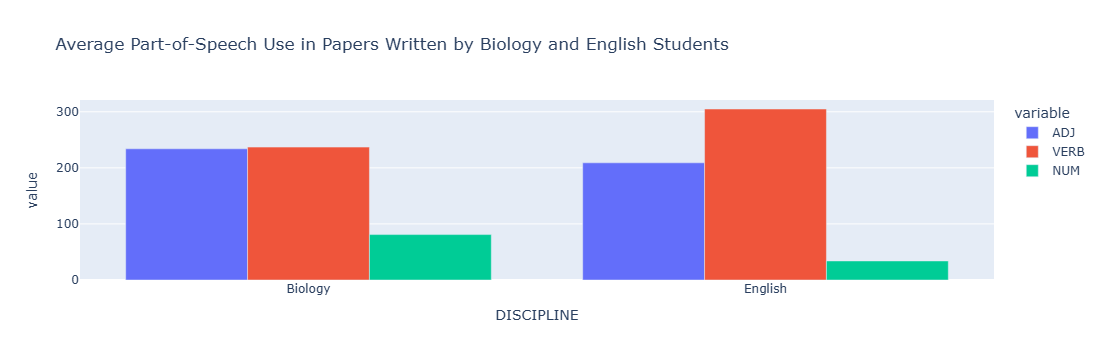

In [123]:
# Use plotly to plot proper noun use per genre
fig = px.bar(average_pos_df, x="DISCIPLINE", y=["ADJ", 'VERB', "NUM"], title="Average Part-of-Speech Use in Papers Written by Biology and English Students", barmode='group')
fig.show()

Though admittedly a simple analysis, calculating part-of-speech frequency counts affirms prior studies which posit a correlation between lexico-grammatical features and disciplinary conventions, suggesting this application of spaCy can be adapted to serve other researchers’ corpora and part-of-speech usage queries9.

### Named Entity Analysis

In this section, you’ll use the named entity tags extracted from spaCy to investigate the second research question: Do students use certain named entities more frequently in different academic genres, and does this signify differences in genre conventions?

To start, we’ll create a new DataFrame with the text filenames, types (genres), and named entity words and tags:

In [124]:
# Create new DataFrame for analysis purposes
ner_analysis_df = final_paper_df[['Filename','PAPER TYPE', 'Named_Entities', 'NE_Words']]

Using the str.count method, we can get counts of a specific named entity used in each text. Let’s get the counts of the named entities of interest here (PERSON, ORG, DATE, and WORKS_OF_ART) and add them as new columns of the DataFrame.



In [125]:
# Convert named entity lists to strings so we can count specific entities
ner_analysis_df['Named_Entities'] = ner_analysis_df['Named_Entities'].apply(lambda x: ' '.join(x))

# Get the number of each type of entity in each paper
person_counts = ner_analysis_df['Named_Entities'].str.count('PERSON')
loc_counts = ner_analysis_df['Named_Entities'].str.count('LOC')
date_counts = ner_analysis_df['Named_Entities'].str.count('DATE')
woa_counts = ner_analysis_df['Named_Entities'].str.count('WORK_OF_ART')

# Append named entity counts to new DataFrame
ner_counts_df = pd.DataFrame()
ner_counts_df['Genre'] = ner_analysis_df["PAPER TYPE"]
ner_counts_df['PERSON_Counts'] = person_counts
ner_counts_df['LOC_Counts'] = loc_counts
ner_counts_df['DATE_Counts'] = date_counts
ner_counts_df['WORK_OF_ART_Counts'] = woa_counts

ner_counts_df.head()

Genre  PERSON_Counts  LOC_Counts  DATE_Counts  \
0  Argumentative Essay              7           7           23   
1  Argumentative Essay             83          12          154   
2  Argumentative Essay              2           0            2   
3             Proposal             14           6           19   
4             Proposal             30           8           71   

   WORK_OF_ART_Counts  
0                   1  
1                  12  
2                   0  
3                   0  
4                   0

From here, we can compare the average usage of each named entity and plot across paper type.

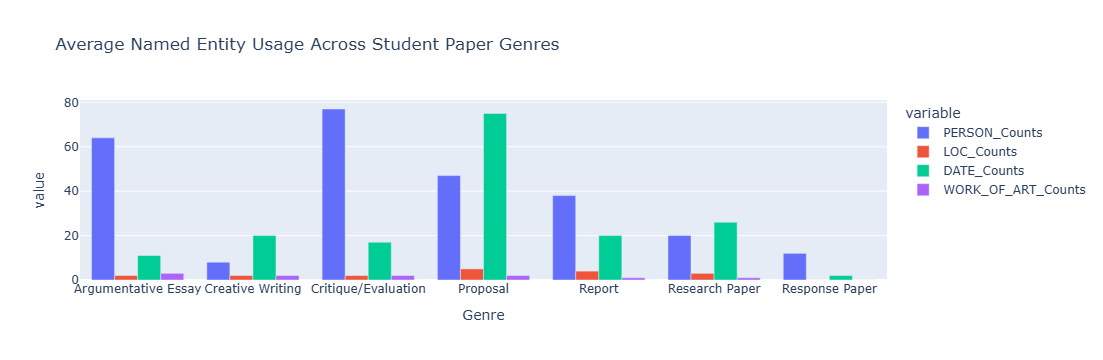

In [126]:
# Calculate average usage of each named entity type
average_ner_df = ner_counts_df.groupby(['Genre']).mean()
average_ner_df = average_ner_df.round(0)
average_ner_df = average_ner_df.reset_index()
average_ner_df

# Use plotly to plot proper noun use per genre
fig = px.bar(average_ner_df, x="Genre", y=["PERSON_Counts", 'LOC_Counts', "DATE_Counts", 'WORK_OF_ART_Counts'], title="Average Named Entity Usage Across Student Paper Genres", barmode='group')
fig.show()

As hypothesized at the start of this lab: more dates and numbers are used in description-heavy proposals and research papers, while more people and works of art are referenced in arguments and critiques/evaluations. Both of these hypotheses are predicated on engaging with and assessing other scholarship.

Interestingly, people and locations are used the most frequently on average across all genres, likely because these concepts often appear in citations. Overall, locations are most frequently invoked in proposals and reports. Though this should be investigated further through close reading, it does follow that these genres would use locations frequently because they are often grounded in real-world spaces in which events are being reported or imagined.

### Analysis of ```DATE``` Named Entities

Let’s explore patterns of one of these entities’ usage (DATE) further by retrieving the words most frequently tagged as dates in various genres. You’ll do this by first creating functions to extract the words tagged as date entities in each document and adding the words to a new DataFrame column:

In [127]:
# Define function to extract words tagged as "date" named entities from doc objects
def extract_date_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'DATE']

# Get all date entity words and apply to new column of DataFrame
ner_analysis_df['Date_Named_Entities'] = final_paper_df['Doc'].apply(extract_date_named_entities)


# Make list of date entities a string so we can count their frequencies
ner_analysis_df['Date_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['Date_Named_Entities']]

Now we can retrieve only the subset of papers that are in the proposal genre, get the top words that have been tagged as “dates” in these papers and append them to a list.spaCy outputs a list of the 10 words most-frequently labeled with the DATE named entity tag in Proposal papers:

In [128]:
# Search for only date words in proposal papers
date_word_counts_df = ner_analysis_df[(ner_analysis_df == 'Proposal').any(axis=1)]

# Count the frequency of each word in these essays and append to list
date_word_frequencies = date_word_counts_df.Date_Named_Entities.str.split(expand=True).stack().value_counts()

# Get top 10 most common words and their frequencies
date_word_frequencies[:10]

2004,    49
2005,    30
2002,    24
2000,    22
the      20
2003,    18
2006,    17
1998,    12
2001,    12
year,     9
Name: count, dtype: int64

The majority are standard 4-digit dates; though further analysis is certainly needed to confirm, these date entities seem to indicate citation references are occurring. This fits in with our expectations of the proposal genre, which requires references to prior scholarship to justify students’ proposed claims.

Let’s contrast this with the top DATE entities in Critique/Evaluation papers. Now, spaCy outputs a list of the 10 words most-frequently labeled with the DATE named entity tag in Critique/Evaluation papers:

In [129]:
# Search for only date words in critique/evaluation papers
date_word_counts_df = ner_analysis_df[(ner_analysis_df == 'Critique/Evaluation').any(axis=1)]

# Count the frequency of each word in these essays and append to list
date_word_frequencies = date_word_counts_df.Date_Named_Entities.str.split(expand=True).stack().value_counts()

# Get top 10 most common words and their frequencies
date_word_frequencies[:10]

the         10
winter,      8
years,       6
1960,        5
2009         5
century,     5
1950,        5
day,         3
decade,      3
decades,     3
Name: count, dtype: int64

Here, only three of the most-frequently tagged DATE entities are standard 4-digit dates, and the rest are noun references to relative dates or periods. This, too, may indicate genre conventions, such as the need to provide context and/or center an argument in relative space and time in evaluative work. Future research could analyze chains of named entities (and parts-of-speech) to get a better understanding of how these features together indicate larger rhetorical tactics.



### Conclusions

In this lab, we’ve gleaned more information about the grammatical makeup of a text corpus. Such information can be valuable to researchers who are seeking to understand differences between texts in their corpus: What types of named entities are most common across the corpus? How frequently are certain words used as nouns versus objects within individual texts and corpora? What may these frequencies reveal about the content or themes of the texts themselves?

While we’ve covered the basics of spaCy in this lab, it has other capacities, such as word vectorization and custom rule-based tagging, that are certainly worth exploring in more detail. The code can also be altered to work with custom feature sets. A great example of working with custom feaature sets is Susan Grunewald’s and Andrew Janco’s lesson, Finding Places in Text with the World Historical Gazetteer, in which spaCy is leveraged to identify place names of German prisoner of war camps in World War II memoirs, drawing on a historical gazetteer of camp names:
https://programminghistorian.org/en/lessons/finding-places-world-historical-gazetteer#4-building-a-gazetteer

spaCy is an equally helpful tool to explore texts without fully-formed research questions in mind. Exploring linguistic annotations can propel further research questions and guide the development of text-mining methods.

Ultimately, this lab has provided a foundation for corpus analysis with spaCy. Whether you wish to investigate language use in student papers, novels, or another large collection of texts, this code can be repurposed for your use.